# 1.Quantile Method

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Quote-Equity-TCS-EQ-27-01-2021-to-27-04-2021.csv')
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444


In [4]:
df.shape

(59, 14)

In [5]:
df.size

826

In [6]:
df.describe()

,VOLUME,No_of_trades
count,5.900000e+01,59.000000
mean,3.426190e+06,164502.254237
std,1.270419e+06,60573.350608
min,1.165882e+06,53910.000000
25%,2.604486e+06,127163.000000
50%,3.203686e+06,155790.000000
75%,3.835610e+06,184326.000000
max,8.654596e+06,436638.000000


In [7]:
max_threshold = df.No_of_trades.quantile(0.95)
min_threshold = df.No_of_trades.quantile(0.05)
max_threshold, min_threshold

(268110.49999999994, 104536.3)

In [10]:
df[df.No_of_trades<min_threshold]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127
47,11-Feb-21,EQ,"3,215.00","3,219.30","3,185.05","3,213.30","3,204.50","3,206.00","3,201.77","3,339.80","1,506.05",1165882,"3,73,28,84,248.70",53910


In [11]:
df[df.No_of_trades>max_threshold]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
7,13-Apr-21,EQ,"3,214.00","3,214.00","3,073.05","3,246.55","3,120.00","3,104.05","3,116.13","3,354.35","1,675.05",8654596,"26,96,88,83,551.05",436638
36,26-Feb-21,EQ,"2,960.00","2,972.35","2,880.00","2,995.30","2,903.85","2,894.30","2,916.68","3,339.80","1,506.05",5553153,"16,19,67,77,082.55",348532
55,01-Feb-21,EQ,"3,100.00","3,165.00","3,044.10","3,111.35","3,150.00","3,139.35","3,098.04","3,339.80","1,506.05",3985846,"12,34,83,18,212.80",280031


In [14]:
df1 = df[(df.No_of_trades>min_threshold) & (df.No_of_trades<max_threshold)]
df1.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444
5,16-Apr-21,EQ,"3,229.00","3,247.00","3,182.60","3,218.95","3,186.10","3,195.15","3,209.11","3,354.35","1,675.05",3224657,"10,34,82,87,512.60",123918
6,15-Apr-21,EQ,"3,160.30","3,237.25","3,087.45","3,104.05","3,227.00","3,218.95","3,168.14","3,354.35","1,675.05",6062760,"19,20,76,55,907.60",219212


In [15]:
df1.shape

(53, 14)

In [16]:
df1.size

742

In [18]:
df1.describe()

,VOLUME,No_of_trades
count,5.300000e+01,53.000000
mean,3.371324e+06,158611.000000
std,1.000122e+06,35725.612044
min,1.942397e+06,105804.000000
25%,2.658751e+06,128801.000000
50%,3.203686e+06,155790.000000
75%,3.791828e+06,183148.000000
max,6.062760e+06,266786.000000


# 2.Standard Deviation Method

In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [20]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444


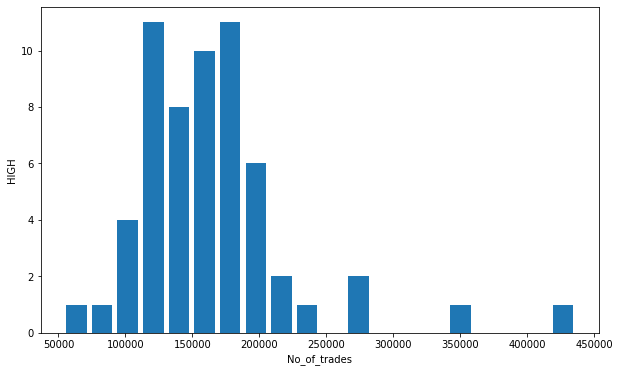

In [21]:
plt.hist(df.No_of_trades, bins=20, rwidth = 0.8)
plt.xlabel('No_of_trades')
plt.ylabel('HIGH')
plt.show()

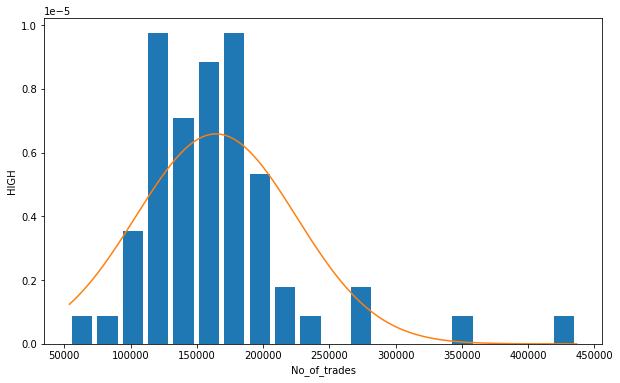

In [22]:
from scipy.stats import norm
import numpy as np
plt.hist(df.No_of_trades, bins=20, rwidth = 0.8, density = True)
plt.xlabel('No_of_trades')
plt.ylabel('HIGH')

rng = np.arange(df.No_of_trades.min(), df.No_of_trades.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.No_of_trades.mean(), df.No_of_trades.std()))
plt.show()

In [23]:
df.No_of_trades.mean()

164502.25423728814

In [24]:
df.No_of_trades.std()

60573.350607738736

In [25]:
upper_limit = df.No_of_trades.mean() + 3*df.No_of_trades.std()
lower_limit = df.No_of_trades.mean() - 3*df.No_of_trades.std()
upper_limit, lower_limit

(346222.30606050434, -17217.797585928056)

In [26]:
df[(df.No_of_trades>upper_limit) | (df.No_of_trades<lower_limit)]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
7,13-Apr-21,EQ,"3,214.00","3,214.00","3,073.05","3,246.55","3,120.00","3,104.05","3,116.13","3,354.35","1,675.05",8654596,"26,96,88,83,551.05",436638
36,26-Feb-21,EQ,"2,960.00","2,972.35","2,880.00","2,995.30","2,903.85","2,894.30","2,916.68","3,339.80","1,506.05",5553153,"16,19,67,77,082.55",348532


In [27]:
df2 = df[(df.No_of_trades>lower_limit) & (df.No_of_trades<upper_limit)]

In [28]:
df2.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444


In [29]:
df2.shape

(57, 14)

In [30]:
df2.size

798

In [31]:
df2.describe()

,VOLUME,No_of_trades
count,5.700000e+01,57.000000
mean,3.297148e+06,156499.350877
std,1.041981e+06,42517.670031
min,1.165882e+06,53910.000000
25%,2.578118e+06,126444.000000
50%,3.179786e+06,154796.000000
75%,3.791828e+06,183148.000000
max,6.062760e+06,280031.000000


# 3.z_score Method

In [32]:
import pandas as pd

In [33]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444


In [34]:
df.describe()

,VOLUME,No_of_trades
count,5.900000e+01,59.000000
mean,3.426190e+06,164502.254237
std,1.270419e+06,60573.350608
min,1.165882e+06,53910.000000
25%,2.604486e+06,127163.000000
50%,3.203686e+06,155790.000000
75%,3.835610e+06,184326.000000
max,8.654596e+06,436638.000000


In [35]:
df['z_score'] = (df.No_of_trades - df.No_of_trades.mean())/(df.No_of_trades.std())

In [36]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades,z_score
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012,-1.279280
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127,-1.178328
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941,0.139314
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928,-0.025989
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444,-0.628300


In [37]:
df.describe()

,VOLUME,No_of_trades,z_score
count,5.900000e+01,59.000000,5.900000e+01
mean,3.426190e+06,164502.254237,-1.176084e-16
std,1.270419e+06,60573.350608,1.000000e+00
min,1.165882e+06,53910.000000,-1.825758e+00
25%,2.604486e+06,127163.000000,-6.164304e-01
50%,3.203686e+06,155790.000000,-1.438298e-01
75%,3.835610e+06,184326.000000,3.272684e-01
max,8.654596e+06,436638.000000,4.492665e+00


In [38]:
df[(df.z_score>3) | (df.z_score<-3)]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades,z_score
7,13-Apr-21,EQ,"3,214.00","3,214.00","3,073.05","3,246.55","3,120.00","3,104.05","3,116.13","3,354.35","1,675.05",8654596,"26,96,88,83,551.05",436638,4.492665
36,26-Feb-21,EQ,"2,960.00","2,972.35","2,880.00","2,995.30","2,903.85","2,894.30","2,916.68","3,339.80","1,506.05",5553153,"16,19,67,77,082.55",348532,3.038131


In [42]:
df_without_outlayers = df[(df.z_score>-3) & (df.z_score<3)]
df_without_outlayers.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades,z_score
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012,-1.279280
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127,-1.178328
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941,0.139314
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928,-0.025989
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444,-0.628300


In [43]:
df_without_outlayers.shape

(57, 15)

In [44]:
df_without_outlayers.size

855

In [45]:
df_without_outlayers.describe()

,VOLUME,No_of_trades,z_score
count,5.700000e+01,57.000000,57.000000
mean,3.297148e+06,156499.350877,-0.132119
std,1.041981e+06,42517.670031,0.701920
min,1.165882e+06,53910.000000,-1.825758
25%,2.578118e+06,126444.000000,-0.628300
50%,3.179786e+06,154796.000000,-0.160240
75%,3.791828e+06,183148.000000,0.307821
max,6.062760e+06,280031.000000,1.907254


# 4.Interquantile Method

In [46]:
import pandas as pd

In [47]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades,z_score
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012,-1.279280
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127,-1.178328
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941,0.139314
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928,-0.025989
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444,-0.628300


In [48]:
q1 = df.No_of_trades.quantile(0.25)
q3 = df.No_of_trades.quantile(0.75)
q1, q3

(127163.0, 184326.0)

In [49]:
IQR = q3 - q1
IQR

57163.0

In [51]:
upper_lt = q3 + 1.5*IQR
lower_lt = q1 - 1.5*IQR
upper_lt, lower_lt

(270070.5, 41418.5)

In [52]:
df[(df.No_of_trades>upper_lt) | (df.No_of_trades<lower_lt)]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades,z_score
7,13-Apr-21,EQ,"3,214.00","3,214.00","3,073.05","3,246.55","3,120.00","3,104.05","3,116.13","3,354.35","1,675.05",8654596,"26,96,88,83,551.05",436638,4.492665
36,26-Feb-21,EQ,"2,960.00","2,972.35","2,880.00","2,995.30","2,903.85","2,894.30","2,916.68","3,339.80","1,506.05",5553153,"16,19,67,77,082.55",348532,3.038131
55,01-Feb-21,EQ,"3,100.00","3,165.00","3,044.10","3,111.35","3,150.00","3,139.35","3,098.04","3,339.80","1,506.05",3985846,"12,34,83,18,212.80",280031,1.907254


In [53]:
df_no_outlayers = df[(df.No_of_trades>lower_lt) & (df.No_of_trades<upper_lt)]
df_no_outlayers.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades,z_score
0,26-Apr-21,EQ,"3,102.05","3,153.00","3,088.05","3,109.50","3,100.05","3,100.80","3,122.35","3,354.35","1,825.00",2490260,"7,77,54,64,961.20",87012,-1.279280
1,23-Apr-21,EQ,"3,105.00","3,119.00","3,091.05","3,118.80","3,110.20","3,109.50","3,105.86","3,354.35","1,719.15",1615309,"5,01,69,30,338.85",93127,-1.178328
2,22-Apr-21,EQ,"3,148.00","3,148.00","3,105.25","3,144.55","3,121.05","3,118.80","3,122.39","3,354.35","1,719.15",1988980,"6,21,03,80,335.40",172941,0.139314
3,20-Apr-21,EQ,"3,225.00","3,225.35","3,126.35","3,161.80","3,140.00","3,144.55","3,150.28","3,354.35","1,719.15",3141893,"9,89,78,43,132.45",162928,-0.025989
4,19-Apr-21,EQ,"3,169.00","3,189.00","3,135.10","3,195.15","3,159.15","3,161.80","3,164.13","3,354.35","1,719.15",2679106,"8,47,70,31,167.55",126444,-0.628300


In [54]:
df_no_outlayers.size

840

In [55]:
df_no_outlayers.shape

(56, 15)

In [56]:
df_no_outlayers.describe()

,VOLUME,No_of_trades,z_score
count,5.600000e+01,56.000000,56.000000
mean,3.284850e+06,154293.428571,-0.168537
std,1.047228e+06,39474.170445,0.651676
min,1.165882e+06,53910.000000,-1.825758
25%,2.565236e+06,125812.500000,-0.638726
50%,3.160840e+06,154665.500000,-0.162394
75%,3.778869e+06,178064.500000,0.223898
max,6.062760e+06,266786.000000,1.688593
